In [1]:
import numpy as np 
import matplotlib.pyplot as plt

import numpy.random as random
from operator import itemgetter

from random import sample

plt.style.use('seaborn-whitegrid')

# Plot data and find order of polynomial

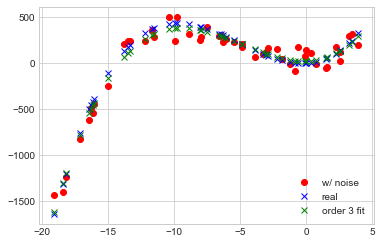

In [139]:
noise_scale = 100 

number_of_samples = 50 

#define the noisy data
x = 25*(np.random.rand(number_of_samples, 1) - 0.8)
y = 7*x + 15*x**2 + 1*x**3 + noise_scale*np.random.randn(number_of_samples, 1)

#this is the real polynomial 
y2 = 7*x + 15*x**2 + 1*x**3

#flatten to 1D vectors 
xf = x.flatten()
yf = y.flatten()


#fit the polynomimal and find the MSE 
def polyplotter(m, x, y):
    #find the coefficients
    params = np.polyfit(x,y, m)
    
    total = 0
    i = 0
    while m >= 0:
        #calculate y-hat
        total += params[m]*x**(i)
        m -= 1
        i += 1
        
    return total
#array that holds all MSE values for each data point 
mse_array = np.array([])    

#change this range to create plots with different orders
for i in range(3,4):
    plt.plot(x,y,'ro',label = 'w/ noise')
    plt.plot(x,y2,'bx',label = 'real')
    
    #plot the flattened, noisy data, with i = order 
    plotter = polyplotter(i, xf, yf)
    
    plt.plot(xf,plotter,'gx', label = 'order {} fit'.format(i))
    plt.legend()
    plt.show() 
    

    plotter = np.array(plotter)
    yf = np.array(yf)
    
    #calculate MSE 
    diff = yf - plotter
    ans = 1/len(plotter)*np.dot(diff, diff)
    
    
    mse_array = np.append(mse_array,ans)



# Define functions to be used for genetic algorithm 
## we will use a genetic algorithm to find the coefficients that lead to the line of best fit for the same noisy data

In [149]:
#define the fitness function, where we calculate the MSE 
def fitness(xf,yf,chromo):
    coefsANDmse = []
    msearr = []
    
    for i in range(len(chromo)):
        x = xf 
        y = yf
        #chromo is a list of four coefficients 
        a,b,c,d = chromo[i]
        #calculate y-prime 
        y_prime = a*x**3 + b*x**2 + c*x + d
        #for each chromosome we calculate the MSE with each (x,y) data point and sum the MSE 
        ans = sum(y-y_prime)**2
        msearr.append(ans)
        #array that contains each chromosome and their respective MSE 
        coefsANDmse.append([chromo[i],ans])
    #sort the chromosomes by their respective MSE 
    result = sorted(coefsANDmse, key = itemgetter(1))
    #result is sorted from smallest MSE to largest MSE
    #choose the top ten results (smallest MSE)
    topTen = np.array(result[0:10])
    
    #discard MSE values 
    topTen = topTen[:,0]
    
    return topTen 



def crossover(tops,tops1,xoverRate):
    #random integer that will be compared to predetermined xoverRate
    r_cross = np.random.rand()
    
    #create the two parents and children 
    parent1 = tops 
    parent2 = tops1 
    child1 = np.array([])
    child2 = np.array([])
    
    #if r_cross is less than the xoverRate, then we will perform crossover
    if r_cross < xoverRate:
        #select some point in the string to crossover 
        xoverPoint = np.random.randint(1, len(tops)-1)
        #perform the crossover 
        child1 = np.concatenate((parent1[:xoverPoint],parent2[xoverPoint:]),axis=0)
        child2 = np.concatenate((parent2[:xoverPoint],parent1[xoverPoint:]),axis=0)
        
        return child1, child2
    else: 
        return parent1, parent2 
    
    
def mutate(crossed,mutRate):
    #r_mut is randomm value, will compare to predetermined mutRate
    r_mut = np.random.rand()
    if r_mut < mutRate: 
        for l in range(len(crossed)): 
            #flip the values and multiply by 0.5
            #this mutation rule is arbitrary and can be changed 
            crossed[l] = 1-crossed[l]*0.5
    return crossed
    


#final genetic algorithm, here we call all of the above functions     
def genetic_algo(xf,yf,matrix1,num_iter,xoverRate,threshold):
    #matrix1 contains our initial random population of 100 chromosomes 
    #initialize our placeholder population 
    population = []
    #find the top ten chromosomes 
    tops = fitness(xf,yf,matrix1) 
    
    for i in range(num_iter):
    
        for j in range(len(tops)-1):
            #take the top ten and for every pair(which are the parents) perform crossover 
            child1,child2 = crossover(tops[j],tops[j+1],xoverRate)
        
            #add the crossover children to the placeholder population, if applicable 
            population += child1,child2
            
            population = np.array(population)
            #create a new population that contains oringial population plus the new children(from placeholder pop)
            new_pop = np.concatenate((matrix1,population),axis = 0)
            new_pop = np.array(new_pop)
        
            #pick a random subset from the new population, which contains all generations thus far
            subfirst = np.random.randint(0,len(new_pop)-1)
            subsecond = np.random.randint(0,len(new_pop)-1)

            #sample of new population will be used for mutation 
            toBeMutated = new_pop[subfirst:subsecond]
            #mutation rate is between 1/len(new_pop) and 1/50
            a = float(1/50)
            mutRate = random.uniform(1/len(new_pop), a)
            #perform mutation if applicable 
            mutated = mutate(toBeMutated,mutRate)
            #new population now contains mutated chromosomes 
            new_pop = np.concatenate((new_pop,mutated),axis = 0)
   
        
        #evaluate the fitness of this new population and select top ten chromosomes 
        evaluated = fitness(xf,yf,new_pop)
        #if our error is still too large, add the next top ten to the population and continue the process until
        #we reach our threshold 
        if error > threshold:
            #increase population 
            new_pop = np.append(new_pop,evaluated)
        else: 
            pass
        #if we are happy with our coefficients then return the top ten and later select the top one 
        return evaluated,error 

            


# Generate Initial Population and call Genetic Algorithm

/var/folders/rj/6xj9852x0fxfntwp49y4v84c0000gn/T/ipykernel_4539/2670370420.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  topTen = np.array(result[0:10])


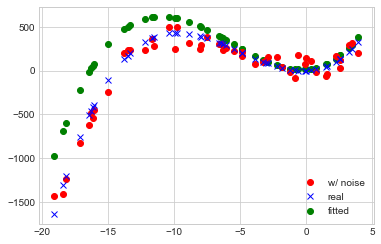

In [162]:
#matrix1 contains our random, initial population, with 100 chromosomes, each of length 4, with values between 0 and 20 
matrix1 = []
for i in range(100):
    matrix1.append(np.random.randint(20,size=4))
    
matrix1 = np.array(matrix1)


#here we set the number of iterations, the crossover rate, and the error threshold
num_iter = 1000

xoverRate = 0.1
 
threshold = 100

#find the coefficients through the genetic algorithm 
coefs,error = genetic_algo(xf,yf,matrix1,num_iter,xoverRate,threshold)

#plot original noisy data and the actual polynomial for reference
plt.plot(x,y,'ro',label = 'w/ noise')
plt.plot(x,y2,'bx',label = 'real')

#function to fit the polynomial with the found coefficients, for plotting purposes only 
def cubic(x,y,params):
    a,b,c,d = params
    plt.scatter(x, a*x**3 + b*x**2 + c*x + d,c='green',label='fitted')
    plt.legend()
    
#fit the polynomial with the top one chromosome(has the smallest MSE)
cubic(xf,yf,coefs[0])
#plot
plt.legend()
plt.show() 



#note that this is not completely accurate and can take a few tries to find the right set of coefficients. 
#this might be because the way i am mutating is not the best way to do so. also results may be better with different 
#mutation rates and crossover rates. However, results significantly improve with an increase in the number of iterations 